# Housing price prediction - A end-to-end ML project

The realisation of this project is mainly inspired by chapter 2 of the Great book *Hands-on Machine Learning* by Aurélien Géron.

Now we dive into this project, endorsing the role of a machine learning engineer contacted by a real estate investment company.

## Context

*We are in the '90s, and some clever guys smell good deals about real estate in California. The problem is that they are numerous, thinking they are brighter than others. In the closed circles of investors, one can hear of incredible deals made in just a few days. However, once you spot a golden opportunity, you can be sure that dozens of big wallets have already made offers to purchase. As wise investors, our client company knows that time is money. Being the first to spot a great opportunity in this real estate market is a royal way to get golden balls. And that's all decent American investors, wearing sunglasses and smoking cigarillos, wants: golden balls.*

We built our scene with all necessary cliché, and we awkwardly tried a little literature. Let's now be serious and take a closer look at what we have to do precisely to please these gentlemen.

## Problem definition

### What is the objective?

So, our mission is to help these guys to spot opportunities quickly. By opportunities, we mean: **find cheap housing compared to housing with similar characteristics**. A machine learning model could help us to model and predict the price of housing. Suppose our client found housing with a significantly lower cost than predicted by our model. In that case, we have a great chance of having spotted an excellent opportunity. We will then transmit the information to our clients and let them go deeper in the analyse and decide to buy or not. 

### What is the current solution ?

At the moment, analysis and predictions are done manually by expert. This is costly and time-consuming. Also, their estimates of what the property's price should be are not great, so their prediction of potential benefit is imprecise. 

### Frame the problem

*We are back in our office, thinking about how to resolve the problem. We remember our old french mustachoed professor telling us: "Start thinking with paper and pencil before coding like an idiot".*
What is precisely the problem we are facing?
-	It is a supervised learning problem since we have labeld training examples (housing values). 
-	It is a univariate multiple regression problem: We want to predict a unique value (the price) from multiple features (population, median income, location etc.. )
-	We will use a batch learning process because there is no continuous flow of data and their is no parcular need to adjust to changing of data. The data is small enough to fit in memory (*sorry for any anachronism, the memory of the computers in the 90s was maybe not enough.*)




## Download the Data

In [1]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    if not os.path.exists(tgz_path):
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
housing = load_housing_data()

## A quick overview of the data structure



In [2]:
display(housing.head())
display(housing.info())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

In [3]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


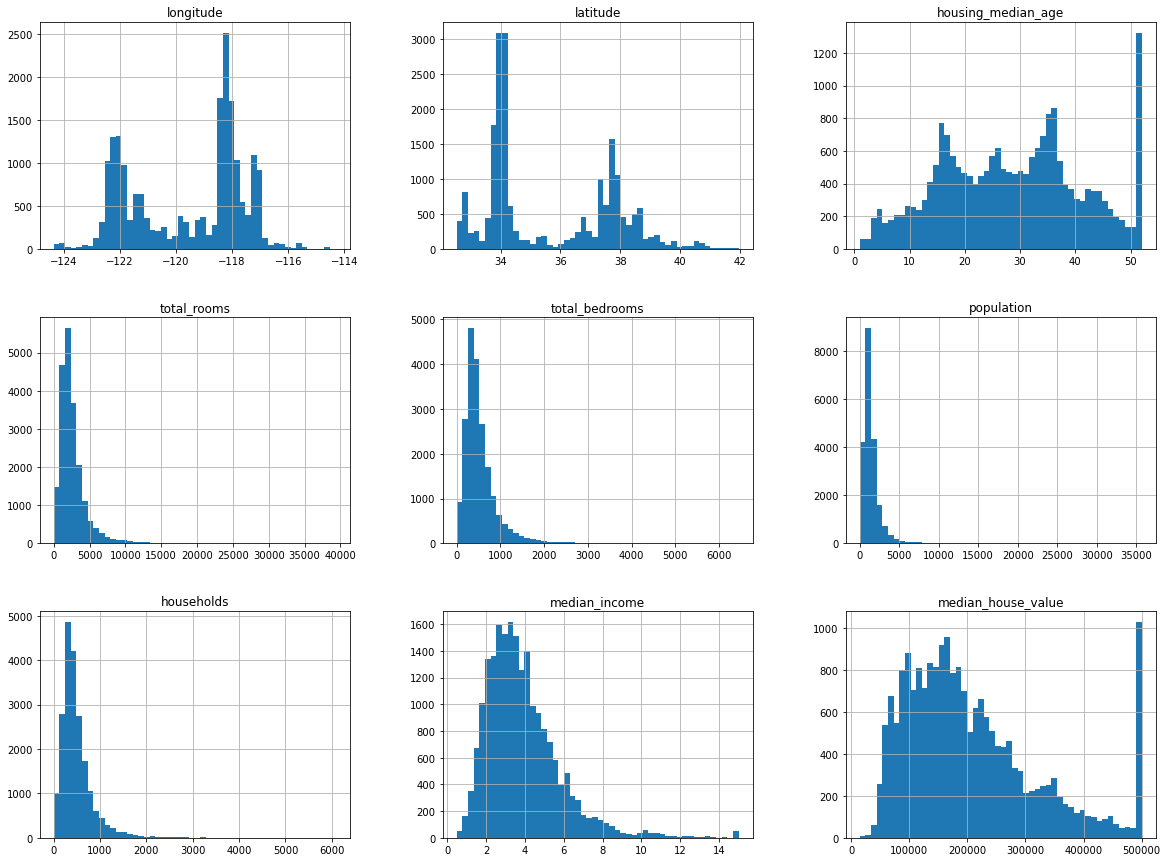

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

**Notes**  
*from kaggle :*
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

- We see that the median house value is capped at 500000$. This is a serious problem since it is our target attribute (the value that we want to predict). Our ML algorithm may learn this pprobably wrong respresentation about real hounsing values and also cap the predictions. As we can collect new proper labels for the distrcicts whose labels were capped (this would be the best solution), we will remove those districts from the training and test sets.

- Attributes have very different scales. We will perform rescaling in order to avoid that some features have stronger weight in prediction just because of their units. 
- Few histogram are bell-shaped (normal distribution) so it can be harder for ML algorithm to detect pattenr. We will apply corrections to these attributes.


## Create Test Set

Creating a test set early on in the analysis process is usefull to avoid [data snooping bias](https://en.wikipedia.org/wiki/Data_dredging)

We choose a repartition with 80% of instances on the training data set and 20% in the test data set. We consider here purely random sampling methods. By fixing a random state value, we ensure that the test set will be the same for subsequent run of the program. 

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Purely random sampling methds may not be the best solution for small datasets because of the higher probabilty to induce significant sampling bias. Sometimes, we want to conserve a certain ratio of instance category when we split the dataset (i.e. stratified sampling).

*Expert predictors told us that they heavily rely on median income to predict housing prices. This is a really important attribute in their opinion. As we are not real estate experts, we must listen what they have to tell us, and listen carrefully to their advices and experience. Let's take a closer look to the median income feature.*


<AxesSubplot:>

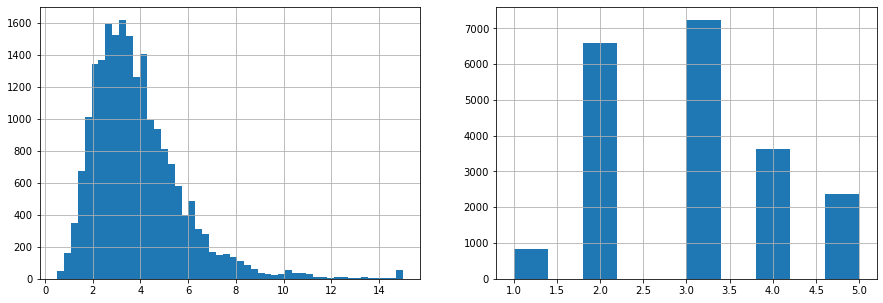

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
housing["median_income"].hist(bins = 50, ax=ax1)
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0,1.5,3.0,4.5,6,np.inf], labels=[1,2,3,4,5])
housing["income_cat"].hist(ax=ax2)

Here we splitted median income in 5 categories (*strata*). We will use this category to do stratified sampling (i.e. create training and test sets matching the proportions of these categories in the full dataset)

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    # n_split = 1 so the loop is walked only once
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [9]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # redo with "income_cat" col

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


Here is the proportion of each income catagory for stratified and random test sets compared to the whole dataset. We note that, as expected, the proportion of each category is closer to the inital dataset using the stratified method. We will see later wich one we will use. As Aurelien Géron emphasis, test set generation is an often neglected but critical part of a ML project. It's important to keep in mind that different technics exists and which can be useful for different needs.

In [10]:
# remove income_cat attribute
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and Visualize the data to gain insights

In [11]:
import plotly.express as px
housing = strat_train_set.copy()

fig = px.scatter(housing, x="longitude", y="latitude",
    size=housing["population"]/100, size_max=30, opacity=0.7,
    color="median_house_value", width=1000, height=1000,
    color_continuous_scale="jet", template="simple_white")#, hover_name=())
fig.show()

We can clearly see that housing price is higher in high population density zone and close to the sea.
That's a great insight indicating that population and location may be crucial features for our model. 

Another way to see if there is any obvious pattern is our dataset is to check for correlations. We will use the correlation matrix to see if there is any correlation between the features. 


In [12]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

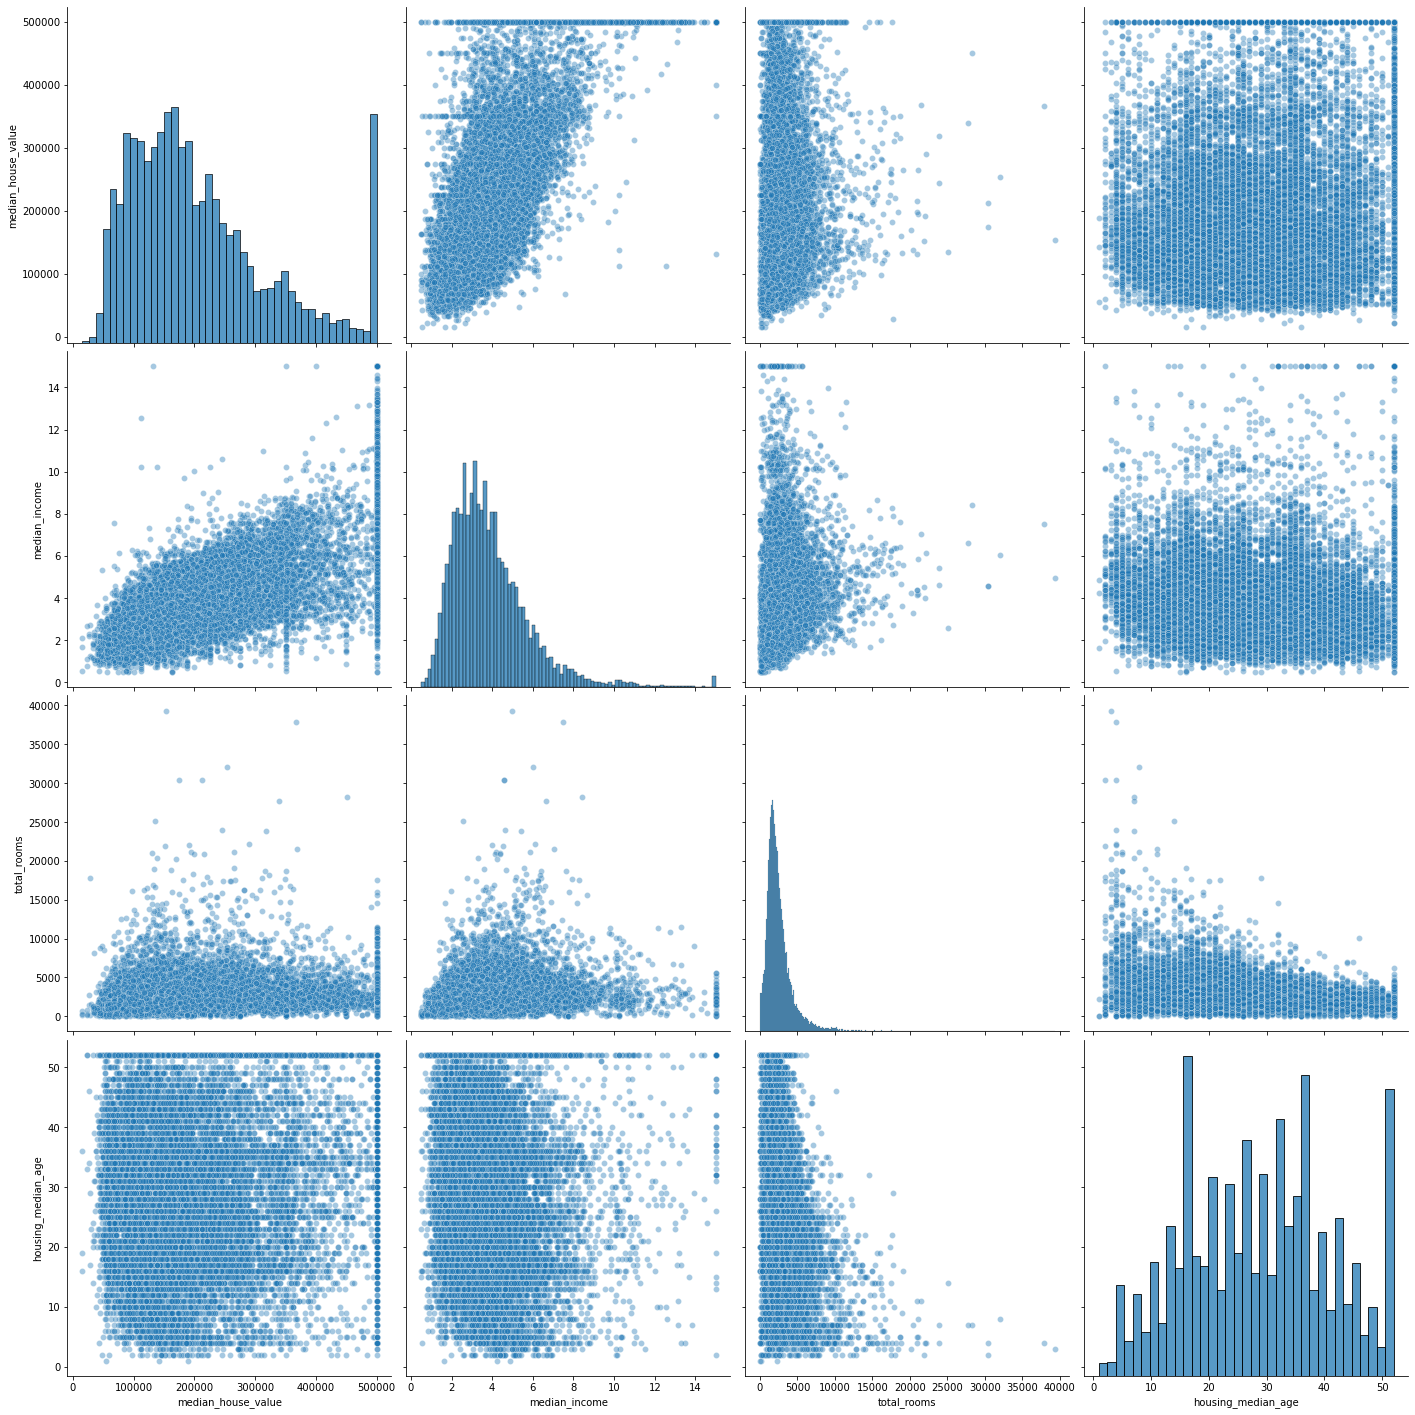

In [13]:
import seaborn as sns
sns.pairplot(housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]], diag_kind = 'hist', height= 5,plot_kws={'alpha': 0.4})
plt.show()

As expected, we can see that the median income is correlated with the median house value. This is an evidence that the median income is an important feature for the median house value prediction.

Experimenting with attribute combinations is a good way to gain insights. For example, we can combine the total rooms and households to create a rooms per household feature. We can also combine the total bedrooms and total rooms to create a bedrooms per room feature.

In [14]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]= housing["population"]/housing["households"]

In [15]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

It is quite interesting to see that rooms per household is more correlated with the median house value than the total rooms feature. Moreover, we can see that the bedrooms per room feature is inversly correlated with the median house value. These new features may be useful to our model. 

## Prepare the Data for Machine Learning Algorithms

In [16]:
# revert to a clean training set and separate predictors
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

A first step is to manage the missing values. We will use the [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) class to replace missing values with the median of the column.

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:

housing_num = housing.drop("ocean_proximity", axis=1) # remove non numerical value
imputer.fit(housing_num)
imputer.statistics_

In [20]:
# Use the trained imputer to fill missing value with corresponding median
X = imputer.transform(housing_num)
# put it back to dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [21]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [22]:
# Handling text data and categorial attributes
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


We will then remove non numerical values. We will transfom the categorical features into numerical features using the OnehotEncorder from scikit-learn. The onehotencoder will transform categorical features into binary features.

In [23]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# housing_cat_1hot is a sparse matrix. useful to avoid to store tons of zeros. 
housing_cat_1hot.toarray()







array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [24]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Finally, we will implement a class to perform the attribute combination, respecting the sci-kit learn convention.

In [28]:
## Custom transformers
# Write custom transformer following scikit-learn arcitecture
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self #nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] /X[:, households_ix]
        population_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# recover dataframe
if attr_adder.add_bedrooms_per_room:
    extra_attribs_names = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
else:
    extra_attribs_names = ["rooms_per_household", "population_per_household"]
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+extra_attribs_names,
    index=housing.index)
housing_extra_attribs.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


## Pipelines

we will package all the steps in a pipeline. We will use the pipeline to perform the data cleaning and the attribute combination. 
Finally, the pipeline will perform four steps:
    -  imputer (replace missing values with the median of the column)
    -  attribute combination (combine features to create new features)
    -  standardization (rescale features to have a mean of 0 and a standard deviation of 1)
    -  onehotencoder (transform categorical features into binary features)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attrib_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housin_prepared = full_pipeline.fit_transform(housing)

In [30]:
housin_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])